In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Q1

In [2]:
comp = pd.read_csv("Company_Data.csv")
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
comp["Sales"].agg(["min","max","median","mean"])

min        0.000000
max       16.270000
median     7.490000
mean       7.496325
Name: Sales, dtype: float64

In [6]:
comp["ShelveLoc"] = comp["ShelveLoc"].map({"Good":1,"Medium":2,"Bad":3})

In [7]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [8]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 34.5+ KB


In [9]:
le1 = LabelEncoder()
le1.fit_transform(comp["Urban"])
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [10]:
le1 = LabelEncoder()
#le1.fit_transform(comp["Us"])
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [11]:
comp = pd.get_dummies(comp,columns=["Urban", "US"], drop_first=True)
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


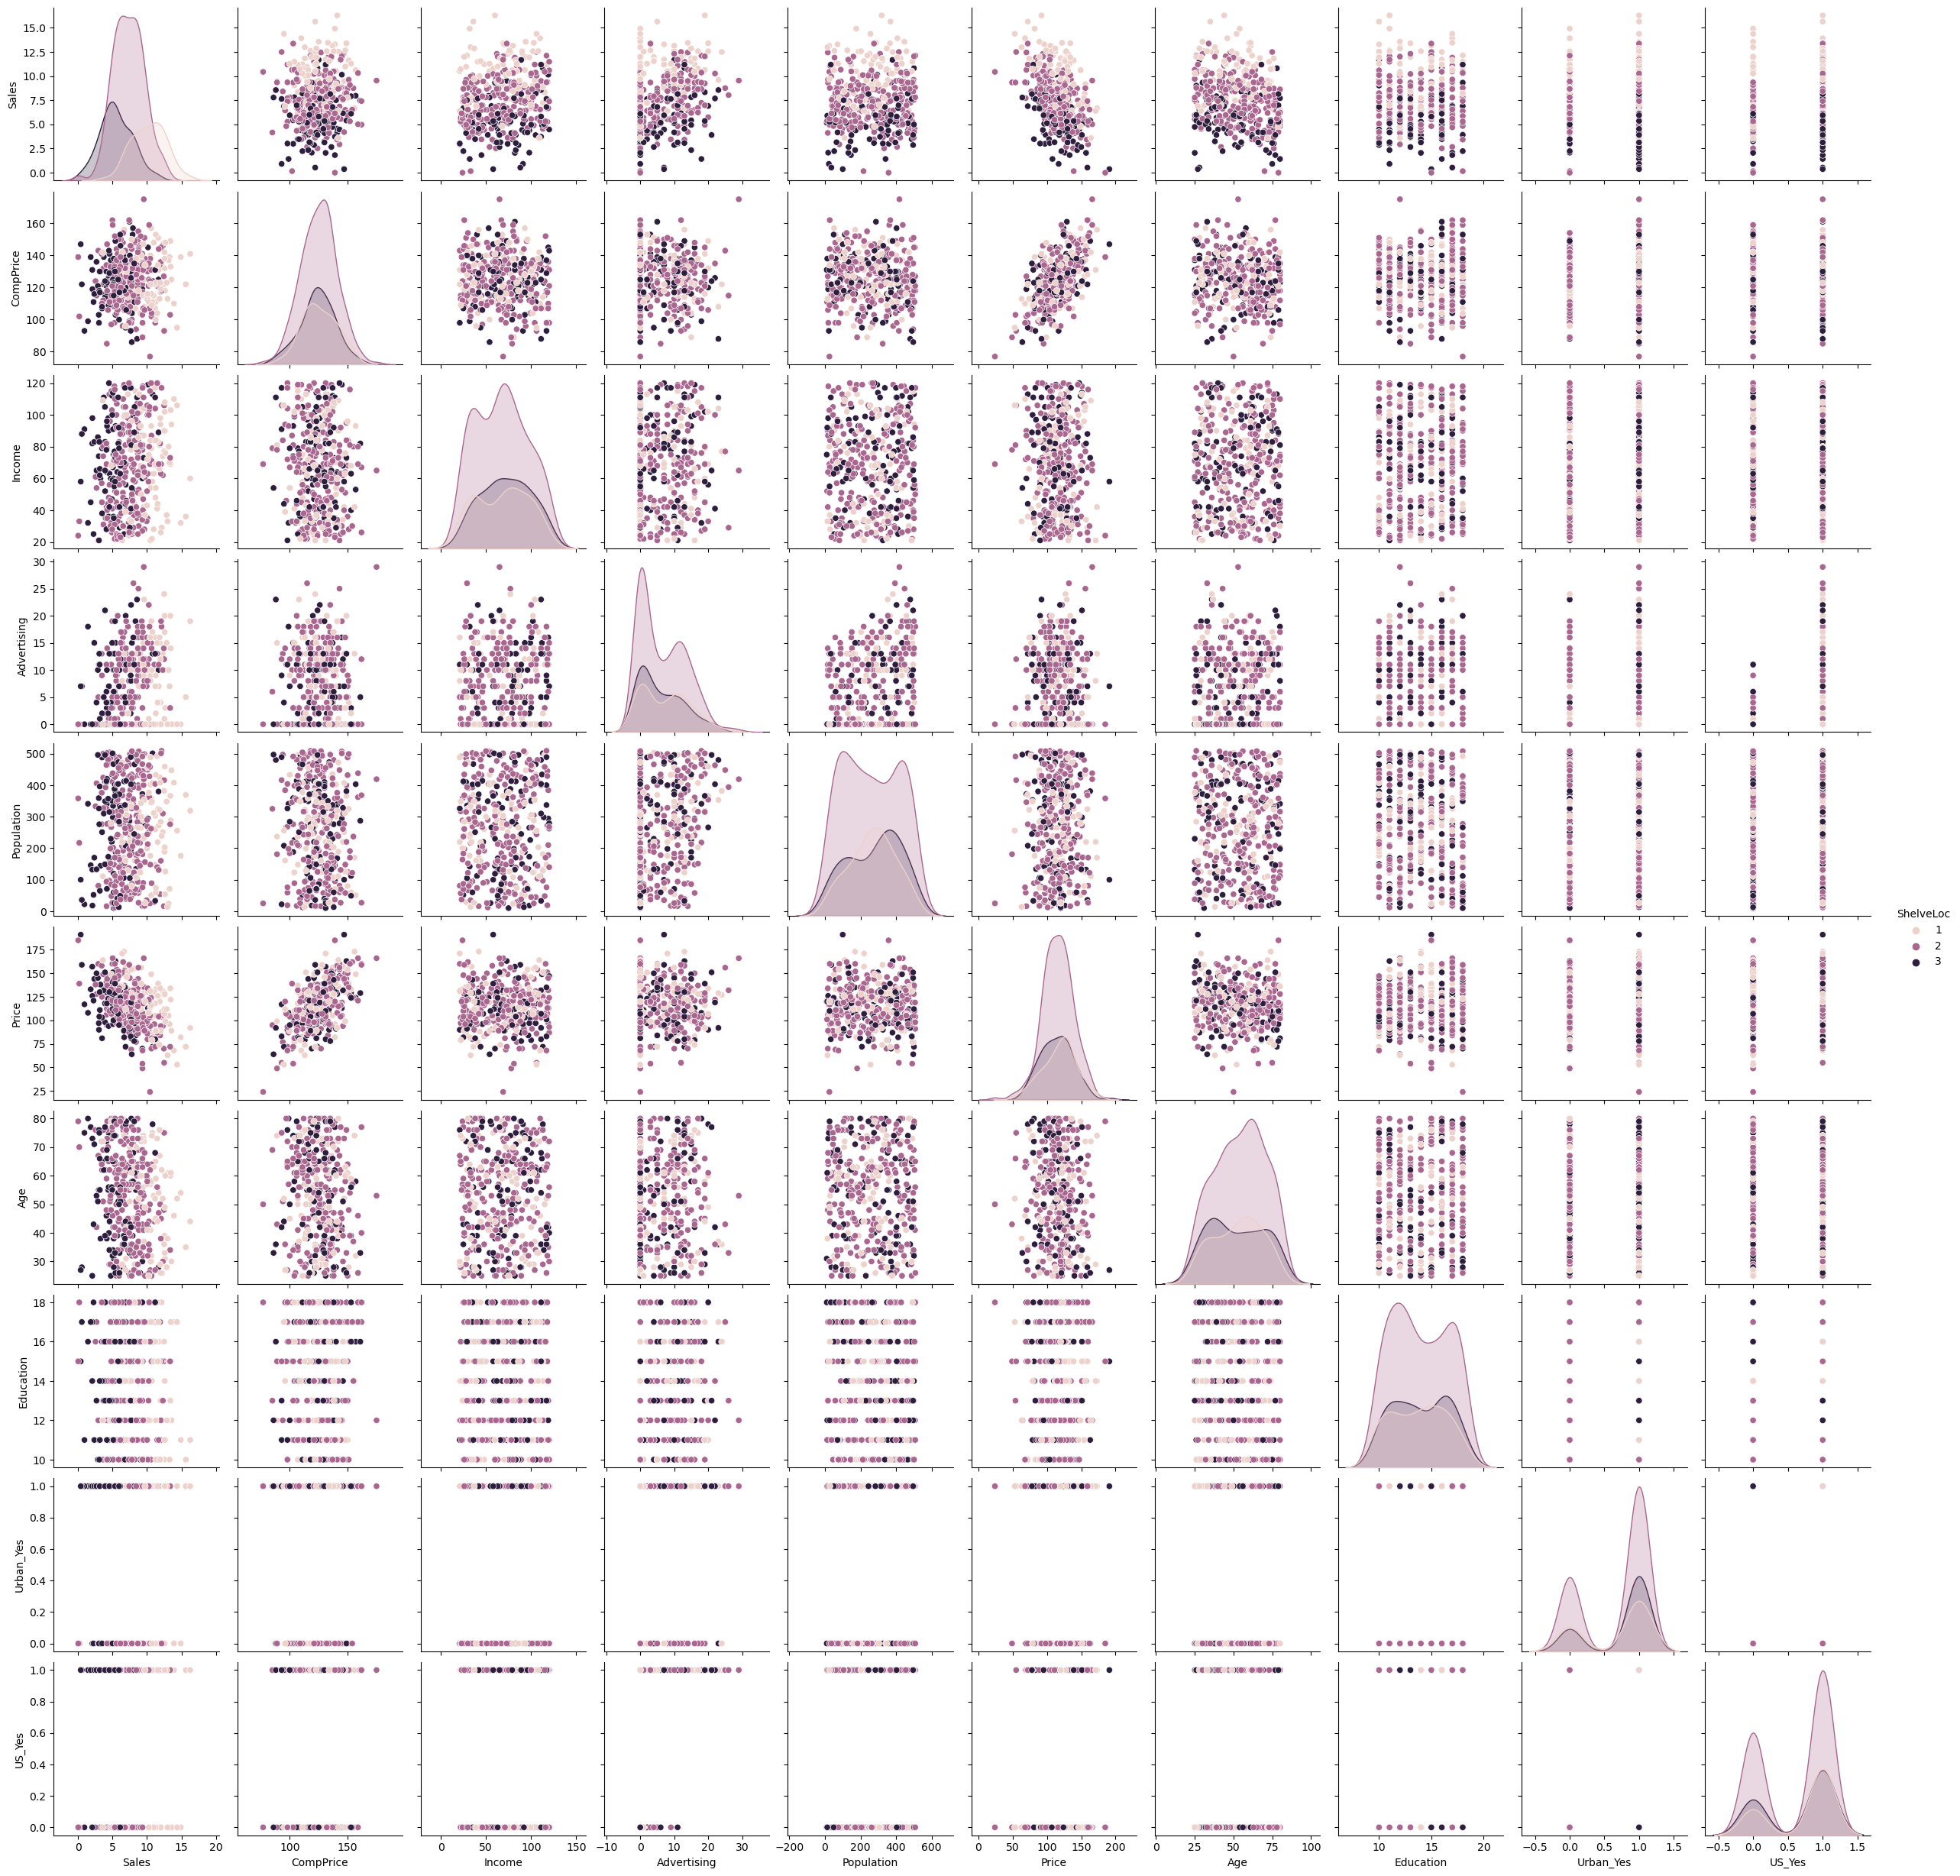

In [12]:
sns.pairplot(data=comp, hue = "ShelveLoc")
plt.show()

In [13]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(2)
memory usage: 29.0 KB


In [14]:
# converting sales in categorical data 
# since the mean and median salary are 7.49, we will divide into 2 categories of less than and more than 7.49
comp["sales"] ="<=7.49"
comp.loc[comp["Sales"]>=7.49,"sales"]=">=7.49"
comp["sales"].value_counts()

>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [15]:
comp = pd.get_dummies(comp,columns=["sales"], drop_first=True)
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_>=7.49
0,9.50,138,73,11,276,120,3,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,3,50,12,1,1,0


In [16]:
X = comp.iloc[:,1:11]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [17]:
y = comp.iloc[: , 11]
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_>=7.49, Length: 400, dtype: uint8

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [19]:
ent = DecisionTreeClassifier(criterion="entropy", max_depth=7)
ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

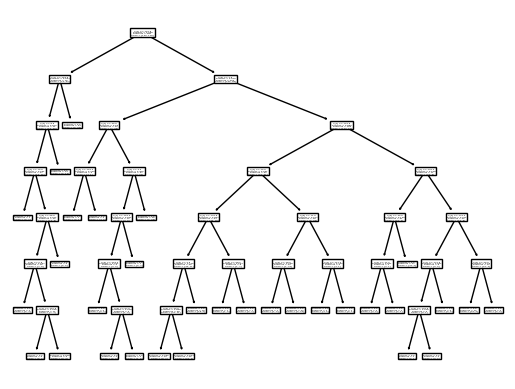

In [20]:
tree.plot_tree(ent)
plt.show()

<Figure size 1500x1200 with 0 Axes>

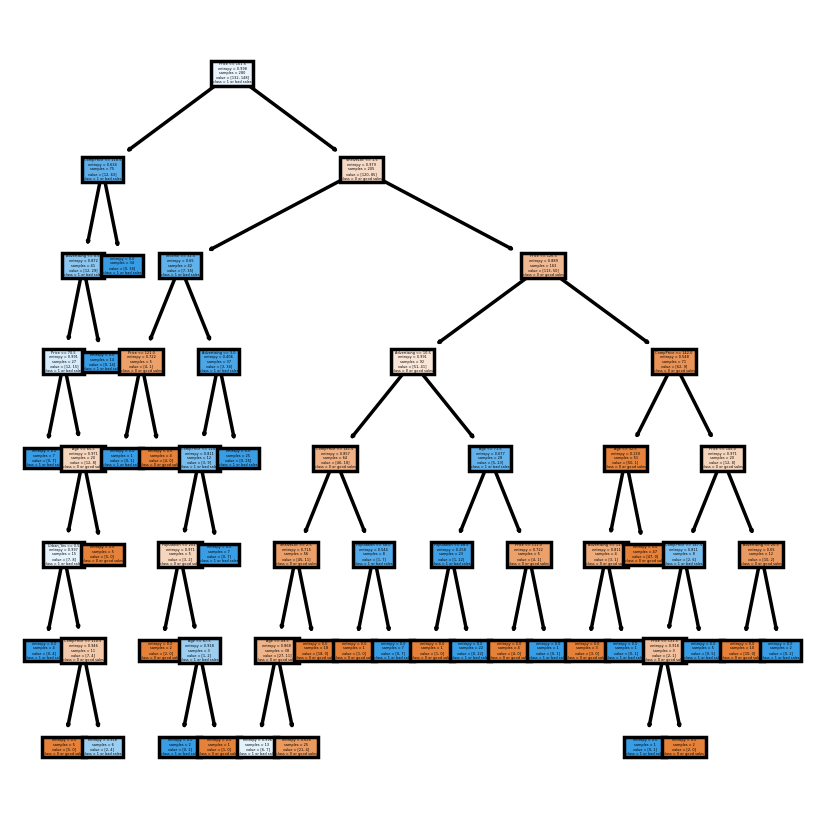

In [21]:
plt.figure(figsize=(15,12))
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban_Yes","US_Yes"]
cn=["0 or good sales","1 or bad sales"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=250)
tree.plot_tree(ent, feature_names=fn, class_names=cn, filled=True);
plt.show()

In [22]:
y_pred = pd.DataFrame(ent.predict(X_test))
y_pred

,0
0,0
1,1
2,1
3,0
4,1
...,...
115,1
116,1
117,0
118,1


In [23]:
roc_auc_score(y_test, y_pred)

0.7245846240495636

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72        67
           1       0.65      0.79      0.71        53

    accuracy                           0.72       120
   macro avg       0.72      0.72      0.72       120
weighted avg       0.73      0.72      0.72       120



# Q2

In [25]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [26]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [27]:
fraud["Taxable.Income"].median()

55074.5

In [28]:
fraud.loc[fraud["Taxable.Income"]>=30000,"Income_30k"]="0"
fraud.loc[fraud["Taxable.Income"]< 30000,"Income_30k"]="1"
fraud.drop(['Taxable.Income',"City.Population"],axis=1,inplace=True)
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,Income_30k
0,NO,Single,10,YES,0
1,YES,Divorced,18,YES,0
2,NO,Married,30,YES,0
3,YES,Single,15,YES,0
4,NO,Married,28,NO,0
...,...,...,...,...,...
595,YES,Divorced,7,YES,0
596,YES,Divorced,2,YES,0
597,NO,Divorced,0,YES,0
598,YES,Married,17,NO,0


In [29]:
fraud["Income_30k"].value_counts()

0    476
1    124
Name: Income_30k, dtype: int64

In [30]:
# label encoding
le = preprocessing.LabelEncoder()
for i in fraud.columns:
    if fraud[i].dtype == object:
        fraud[i] = le.fit_transform(fraud[i])
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,Income_30k
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [31]:
X = fraud.iloc[:,:4]
y = pd.DataFrame(fraud.iloc[:,4])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [34]:
params = [{"criterion": ["gini", "entropy"], "max_depth": range(2,12)}]
tree1 = DecisionTreeClassifier()
clf = GridSearchCV(tree1, params, cv=12, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(cv=12, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 12)}],
             scoring='roc_auc')

In [35]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [49]:
ent = DecisionTreeClassifier(criterion="entropy", max_depth=9)

In [50]:
ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

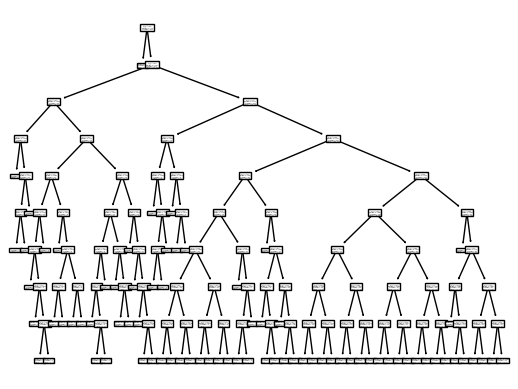

In [51]:
tree.plot_tree(ent);
plt.show()

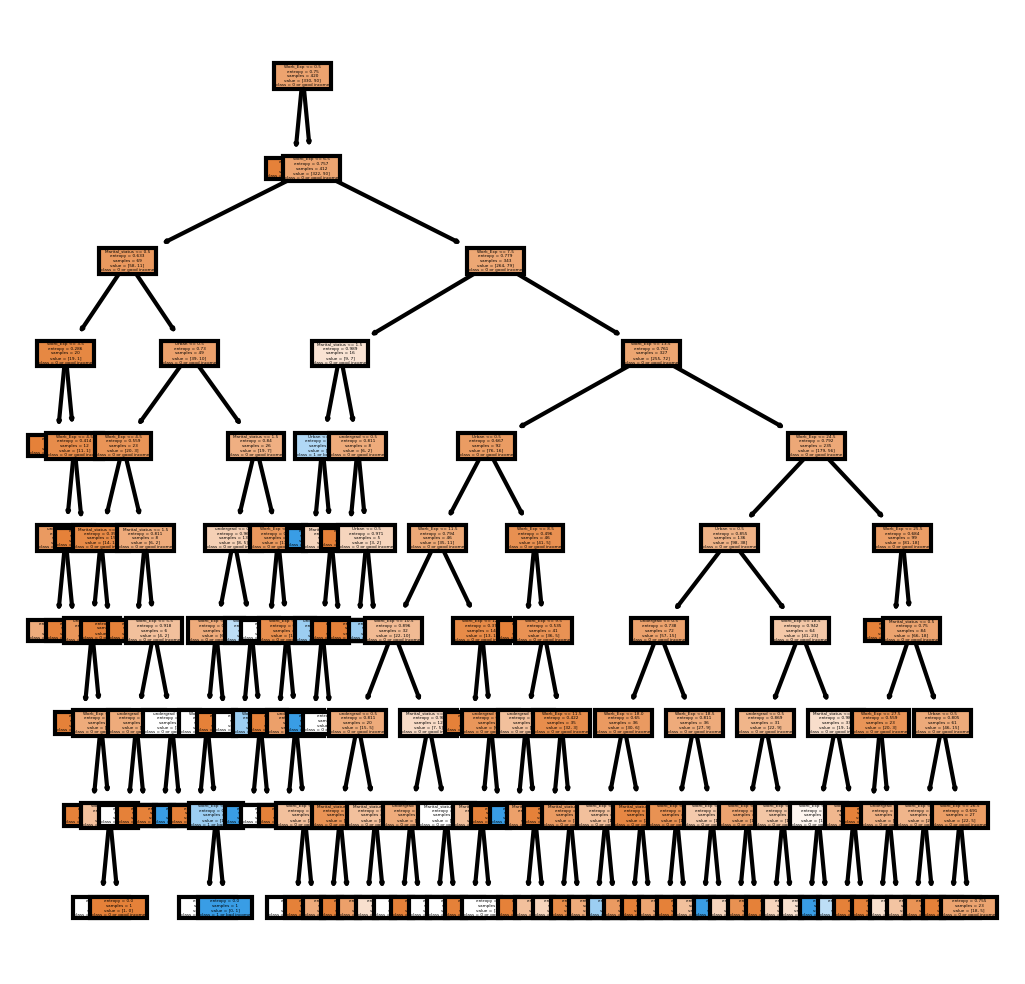

In [52]:
fn = ["undergrad", "Marital_status","Work_Exp","Urban","Invomr_30k"]
cn = ["0 or good income", "1 or bad income"]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(4,4), dpi=300)
tree.plot_tree(ent, feature_names=fn, class_names=cn, filled=True);
plt.show()

In [53]:
y_pred = pd.DataFrame(ent.predict(X_test))
roc_auc_score(y_test, y_pred)

0.5314262691377921

In [54]:
confusion_matrix(y_test, y_pred)

array([[138,   8],
       [ 30,   4]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       146
           1       0.33      0.12      0.17        34

    accuracy                           0.79       180
   macro avg       0.58      0.53      0.53       180
weighted avg       0.73      0.79      0.75       180



In [56]:
y_pred.value_counts()

0    168
1     12
dtype: int64